In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

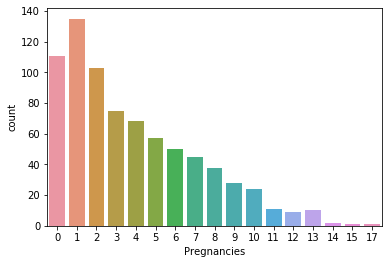

In [9]:
sns.countplot(df['Pregnancies'])

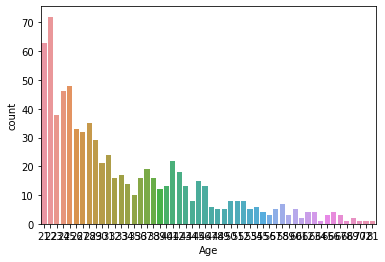

In [10]:
sns.countplot(df['Age'])

In [ ]:
%%time
sns.pairplot(df)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
import pandas_profiling

prof =pandas_profiling.ProfileReport(df)

In [25]:
prof

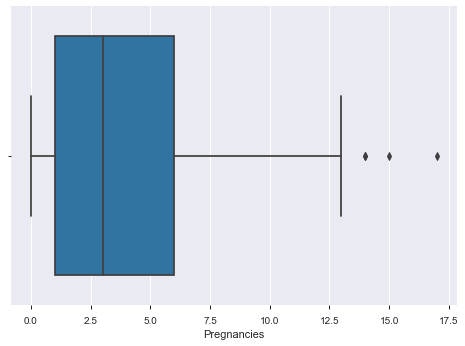

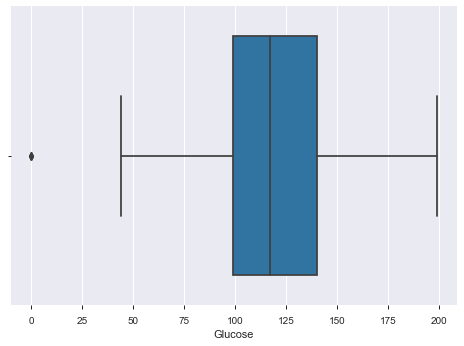

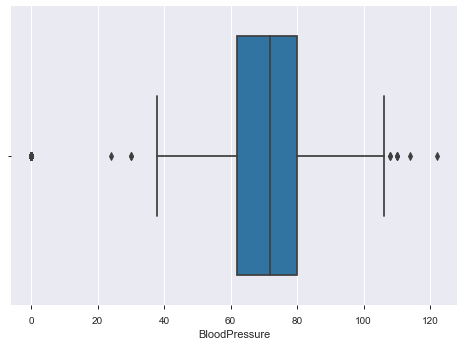

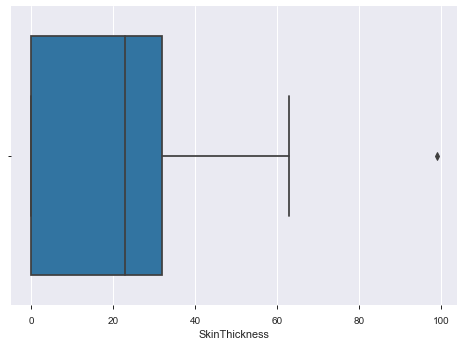

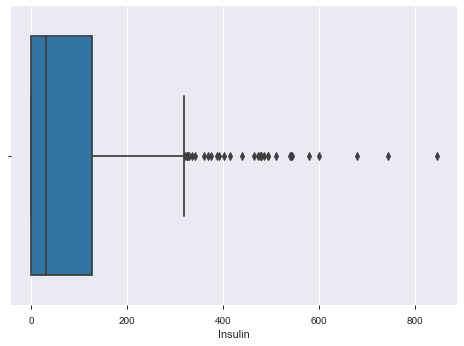

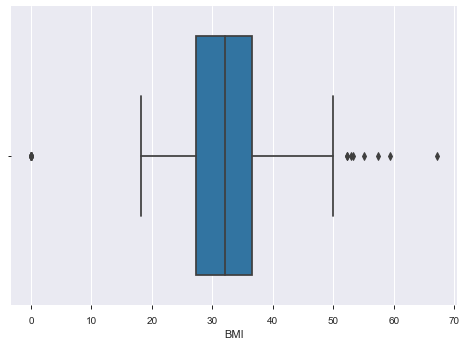

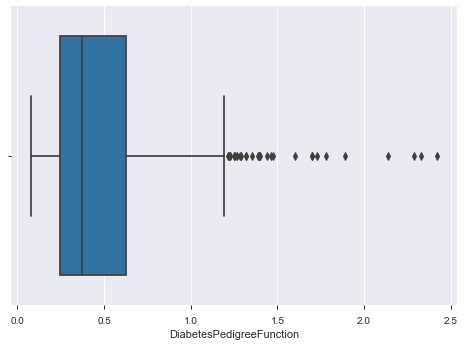

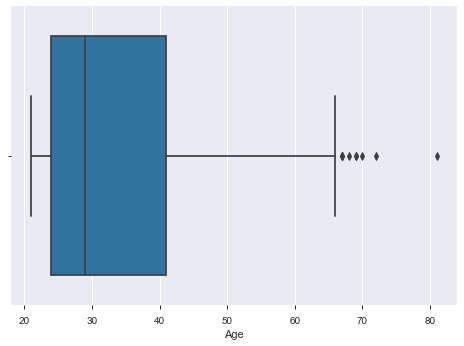

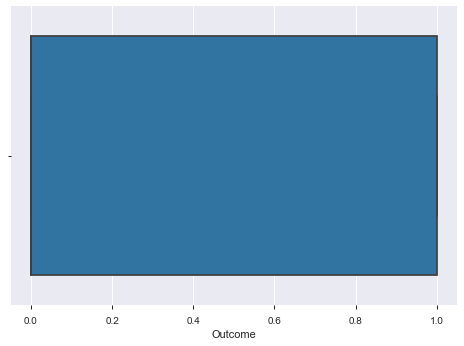

In [24]:
for i in df.columns:
    print(i)
    
    sns.boxplot(df[i])
    plt.show()

There are few outliers are in data in diabatic pedegree function, but before going to treat outliers, we need to check with the client or domain expert.
whether these are really outliers or not.

In [27]:
x = df.drop(columns ='Outcome')
y = df.Outcome

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rf.score(X_train,y_train)

1.0

In [32]:
rf.score(X_test,y_test)

0.7322834645669292

# now apply PCA


In [47]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
xscale =ss.fit_transform(x)
type(xscale)

numpy.ndarray

In [52]:
cov_matrix =np.cov(xscale.T)
cov_matrix.shape

(8, 8)

In [53]:
x.shape

(768, 8)

In [54]:
eig_val,eig_vect =np.linalg.eig(cov_matrix)
eig_val,eig_vect

(array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
        0.76333832, 0.87667054, 1.03097228]),
 array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
          0.47560573, -0.08069115,  0.01308692],
        [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
         -0.46632804,  0.40432871, -0.46792282],
        [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
         -0.32795306, -0.05598649,  0.53549442],
        [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
          0.48786206, -0.03797608,  0.2376738 ],
        [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
          0.34693481,  0.34994376, -0.33670893],
        [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
         -0.25320376, -0.05364595,  0.36186463],
        [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
         -0.11981049, -0.8336801 , -0.43318905],
        [-0.19802707, -0.

In [56]:
tot = sum(eig_val)
lst =[]
for i in sorted(eig_val,reverse =True):
    lst.append(i*100/tot)
lst

[26.1797493161101,
 21.6401267577465,
 12.870373364801903,
 10.944113047600437,
 9.529304819389639,
 8.532854849331152,
 5.247702246321909,
 5.0557755986983555]

In [59]:
cum_var =np.cumsum(lst)

In [60]:
cum_var

array([ 26.17974932,  47.81987607,  60.69024944,  71.63436249,
        81.16366731,  89.69652215,  94.9442244 , 100.        ])

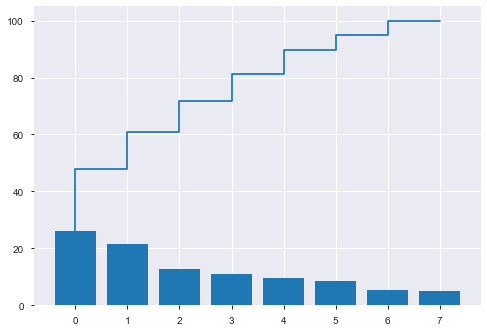

In [63]:
plt.bar(range(8),lst)
plt.step(range(8),cum_var)


In [ ]:
for having 90% of information, we need to use 5 dimensions.

In [105]:
from sklearn.decomposition import PCA
pca =PCA(n_components=6)
xtrainpc = pca.fit_transform(X_train)
xtestpc = pca.transform(X_test)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(xtrainpc,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
rf.score(xtrainpc,y_train)

1.0

In [108]:
rf.score(xtestpc,y_test)

0.7440944881889764